# 데이터셋 준비
공공데이터포털에서 데이터셋 다운

[강원도_코로나19 확진자 현황](https://www.data.go.kr/data/15085319/fileData.do)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/강원도_코로나19 확진자 현황_20210731.csv', encoding="CP949")
data

,시군명,확진시기,확진자수
0,춘천,2020-02-22,2
1,원주,2020-02-22,0
2,강릉,2020-02-22,0
3,동해,2020-02-22,0
4,태백,2020-02-22,0
...,...,...,...
9463,화천,2021-07-31,0
9464,양구,2021-07-31,0
9465,인제,2021-07-31,0
9466,고성,2021-07-31,1


# 데이터 분석 및 시각화

In [3]:
# 한글 폰트 적용
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


시군별 코로나 확진자수 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52632 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0, flags=flags)


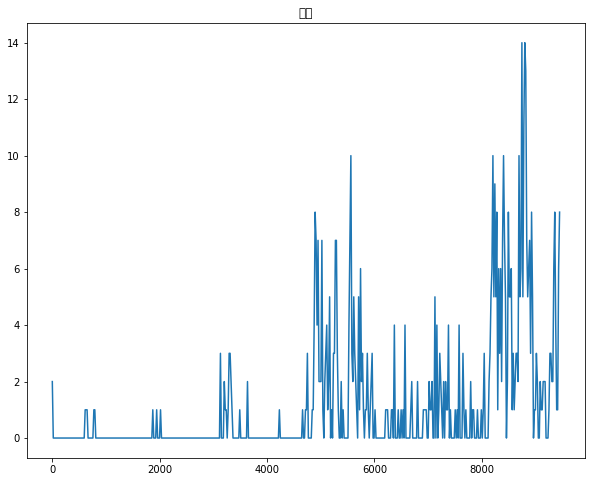

In [4]:
sample = data[data['시군명'] == '춘천']

plt.figure(figsize=(10,8))
plt.title('춘천')
plt.plot(sample['확진자수'])
plt.show()

In [5]:
cols = data['시군명'].unique()
cols

array(['춘천', '원주', '강릉', '동해', '태백', '속초', '삼척', '홍천', '횡성', '영월', '평창',
       '정선', '철원', '화천', '양구', '인제', '고성', '양양'], dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_

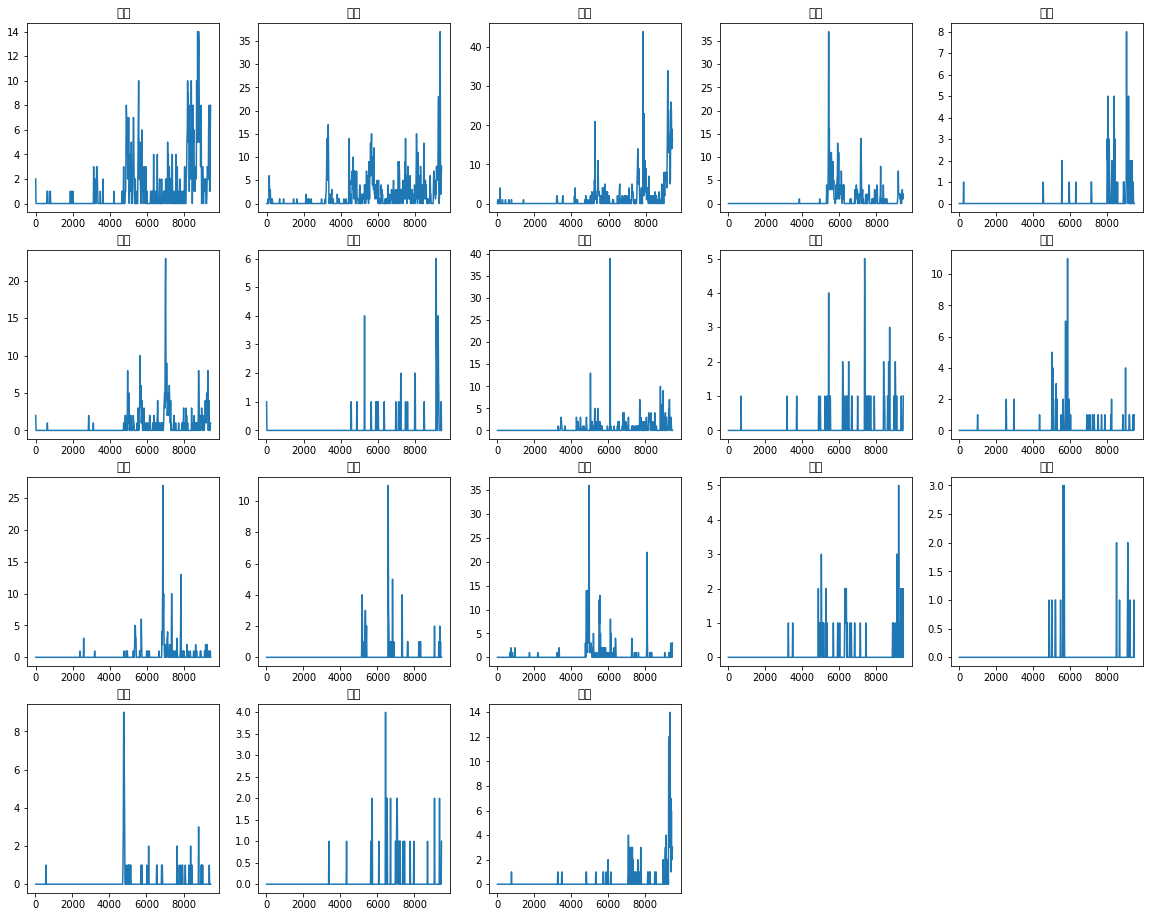

In [6]:
count = data['시군명'].nunique()

plt.figure(figsize=(20,16))

for i in range(count):
  mask = data['시군명'] == cols[i]
  sample = data[mask]
  plt.subplot(4, 5, i+1)
  plt.title(cols[i])
  plt.plot(sample['확진자수'])
plt.show()

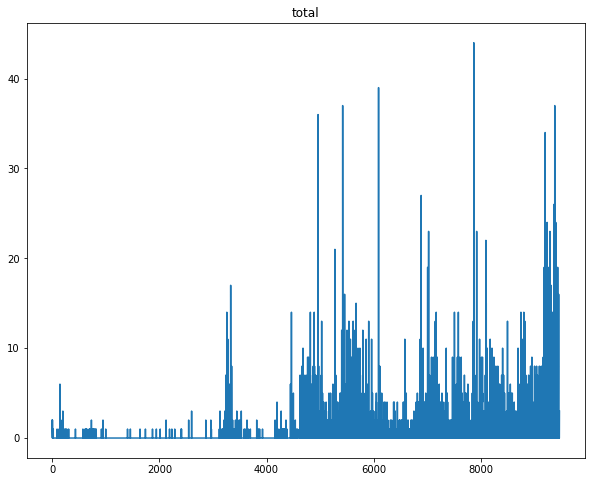

In [7]:
plt.figure(figsize=(10,8))
plt.title('total')
plt.plot(data['확진자수'])
plt.show()

시군별로 봤을 때는 시간이 지날수록 점점 확진자 수는 많아지고 춘천과 원주가 눈에 띕니다. 그리고 강원도 전체적으로 봐도 시간이 지날수록 더 많아집니다.

In [8]:
data['month'] = data['확진시기'].map(lambda x: x.split('-')[0] + x.split('-')[1])
data

,시군명,확진시기,확진자수,month
0,춘천,2020-02-22,2,202002
1,원주,2020-02-22,0,202002
2,강릉,2020-02-22,0,202002
3,동해,2020-02-22,0,202002
4,태백,2020-02-22,0,202002
...,...,...,...,...
9463,화천,2021-07-31,0,202107
9464,양구,2021-07-31,0,202107
9465,인제,2021-07-31,0,202107
9466,고성,2021-07-31,1,202107


월별 확진자수 추이

In [9]:
data.groupby('month').mean()

,확진자수
month,
202002,0.055556
202003,0.053763
202004,0.027778
202005,0.007168
202006,0.014815
202007,0.016129
202008,0.213262
202009,0.057407
202010,0.103943


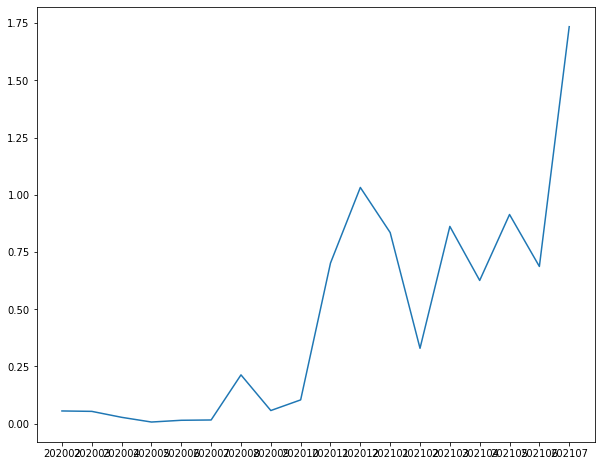

In [10]:
plt.figure(figsize=(10,8))
plt.plot(data.groupby('month').mean())
plt.show()

# 지도 위 시각화

**시군별 확진자수 평균에 따라 원 크기로 각 위치에 지도로 표시합니다.**

라이브러리: follium 이용

folium을 이용하려면 위도와 경도를 알아야 합니다.

​
강원도 춘천 (+16 km), 위도 37.757687 경도 128.873749

강원도 강릉 (+16 km), 위도 38.078366 경도 128.228302

강원도 인제 (+16 km), 위도 38.214446 경도 128.571625

강원도 속초 (+16 km), 위도 37.348326 경도 127.928925

강원도 원주 (+16 km), 위도 37.53151 경도 129.098969

In [11]:
# dat = data[data['시군명'] == '춘천' | data['시군명'] == '강릉']
data = data[data['시군명'].isin(['춘천', '강릉', '인제', '속초', '원주'])]
data

,시군명,확진시기,확진자수,month
0,춘천,2020-02-22,2,202002
1,원주,2020-02-22,0,202002
2,강릉,2020-02-22,0,202002
5,속초,2020-02-22,2,202002
15,인제,2020-02-22,0,202002
...,...,...,...,...
9450,춘천,2021-07-31,8,202107
9451,원주,2021-07-31,8,202107
9452,강릉,2021-07-31,16,202107
9455,속초,2021-07-31,1,202107


In [12]:
fea1 = {'춘천': 37.757687, '강릉': 38.078366, '인제': 38.214446, '속초': 37.348326, '원주': 37.53151}
fea2 = {'춘천': 128.873749, '강릉': 128.228302, '인제': 128.571625, '속초': 127.928925, '원주': 129.098969}

In [13]:
counts = data.groupby('시군명').mean()['확진자수']
counts

시군명
강릉    1.545627
속초    0.671103
원주    1.866920
인제    0.123574
춘천    1.134981
Name: 확진자수, dtype: float64

In [28]:
import folium

map = folium.Map(location = [37.9,128.5], zoom_start=8.4,  width=750, height=500) #지도 초기 위치

for i in counts.index:
  lat = fea1[i]    #위도
  long = fea2[i]   #경도

  folium.CircleMarker([lat, long], radius=counts[i] * 40, color='red', fill=True).add_to(map)

map

지도를 보면 인제와 동해는 확진자수가 많고 속초는 적은 것을 알 수 있습니다.